In [1]:
from skimage.measure import compare_ssim as ssim

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/micael/MyWorkspace/ICA/Functions')
import StatisticalAnalysis, amari
import sys
sys.path.insert(0, '/home/micael/MyWorkspace/PtRelAnalysis/functions')
import HistogramFunctions,FigureFunctions,FitFunctions,FunctionsTypes

from scipy import stats
from sklearn.decomposition import PCA, FastICA
from sklearn.metrics import mean_squared_error

import rootnotes
import root_numpy
import ROOT
import StatisticalAnalysis
#from ROOT import TCanvas, TFile, TPaveText
from scipy.stats import chisquare,kurtosistest,normaltest

source_path = '/home/micael/MyWorkspace/ICA/Mixture_keys'
# local to save all results and images 
save_images = '/home/micael/Documents/Mestrado/ICA/trabalho_parte2'
obs_path = '/home/micael/MyWorkspace/ICA/'

# Calibration of Divergences

In [ ]:
# define the pdf for calibration 
from scipy.stats import *
chi2.stats(4)

In [ ]:
# Calibrate the KL and JS divergences
i_stats = 1000
loc, scale = 0.,1.
laplacian = np.reshape(np.random.laplace(loc,scale, i_stats),[1,i_stats])
uniform = np.reshape(np.random.uniform(-2*scale,2*scale,i_stats),[1,i_stats])
gaus = np.reshape(np.random.normal(loc,scale,i_stats),[1,i_stats])
#rayleigh = np.reshape(np.random.rayleigh(scale, i_stats),[1,i_stats])
#chi = np.reshape(np.random.chisquare(4, i_stats),[1,i_stats])

C = np.zeros([4,i_stats])
C[0,:]=uniform
C[1,:]=gaus
C[2,:]=laplacian
C[3,:]=norm_K
#C[4,:]=chi
#StatisticalAnalysis.JSDiv(C,C)
KL_div= StatisticalAnalysis.CreateKLsMatrix(C,C)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(C,C)

In [ ]:
KL_div,SKL_div,JS_div

In [ ]:
SKL_div,JS_div

# Separate the mixtures
 $\to$ Make decision by using the ROOT Fit

# First Mixture 

Fontes:

$s_0$ = Uniforme

$s_1$ = Gaussiana

$s_2$ = Laplaciana

In [2]:
sources = np.loadtxt(source_path+'/'+'FirstSource100Stats.txt')
matrix_A = np.loadtxt(source_path+'/'+'FirstMixMatrix.txt')

x = np.loadtxt(obs_path+'FirstMixture100Stats.txt')
x.shape,sources.shape

information_algorithm_matrix = np.zeros([5,3])
information_algorithm_matrix.shape

(5, 3)

In [3]:
MI_x = StatisticalAnalysis.create_mutual_info_matrix(x,x)
MI_x

array([[ 1.        ,  0.34259432,  0.19609956],
       [ 0.34259432,  1.        ,  0.31055182],
       [ 0.19609956,  0.31055182,  1.        ]])

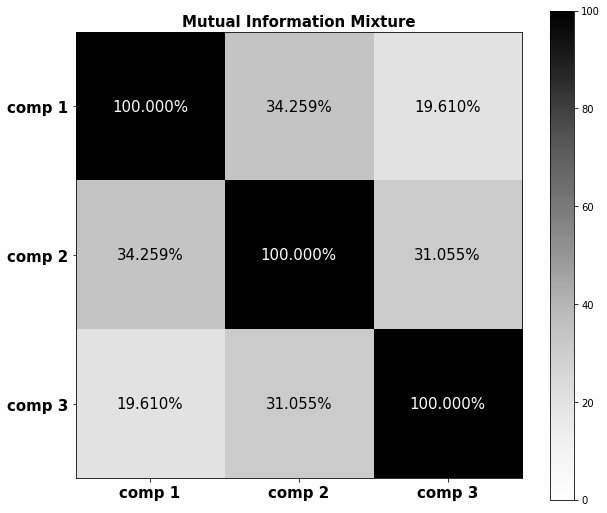

In [8]:
StatisticalAnalysis.plot_mutual_info(MI_x,title='Mixture',output=save_images,name='run1_mix_MI_100',save=True)

In [5]:
MI_s = StatisticalAnalysis.create_mutual_info_matrix(sources,sources)
MI_s

array([[ 1.        ,  0.05473203,  0.09883966],
       [ 0.05473203,  1.        ,  0.1053617 ],
       [ 0.09883966,  0.1053617 ,  1.        ]])

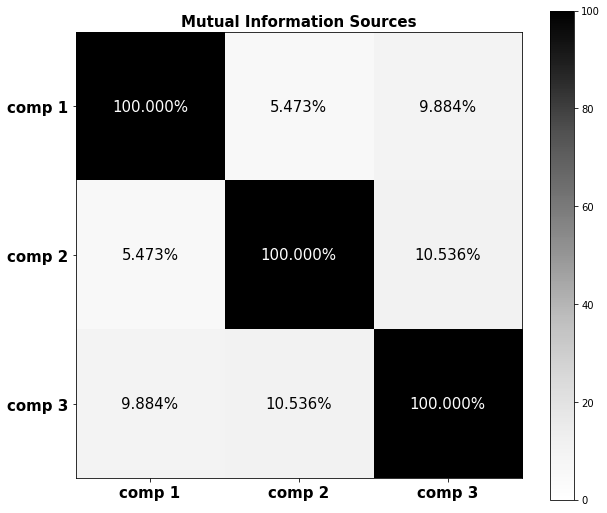

In [9]:
StatisticalAnalysis.plot_mutual_info(MI_s,title='Sources',output=save_images,name='run1_sources_MI_100',save=True)

In [10]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(x,sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(x,sources)

KL_div,SKL_div,JS_div

([array([[ 0.19633556,  0.10533316,  0.39592831],
         [ 0.50110261,  0.19114577,  0.12968076],
         [ 0.5045015 ,  0.23059162,  0.0940266 ]]),
  array([[ 0.29884401,  0.49263639,  0.49743221],
         [ 0.11444944,  0.25419354,  0.26027811],
         [ 0.33343548,  0.10309391,  0.0834194 ]])],
 array([[ 0.24758978,  0.29898477,  0.44668026],
        [ 0.30777602,  0.22266966,  0.19497943],
        [ 0.41896849,  0.16684277,  0.088723  ]]),
 array([[ 0.49461962,  0.12304192,  0.22565522],
        [ 0.28209037,  0.12146036,  0.26658099],
        [ 0.3180378 ,  0.23221848,  0.04960737]]))

In [11]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh')
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)
convergence_time = round(current_time-init_time,3)
numero_interacao = fit.n_iter_

number of interations: 8
Time to converges the FastICA: 0.235 seconds


In [34]:
print 'E1 = ',amari.amariError(matrix_A,fit.mixing_),'E2 = ',amari.amariError(matrix_A,fit.mixing_,squares=True)

E1 =  5.79622812327 E2 =  3.74415332844


In [12]:
MI_reco = StatisticalAnalysis.create_mutual_info_matrix(recovered_sources,recovered_sources)
MI_reco


array([[ 1.        ,  0.10786796,  0.06378789],
       [ 0.10786796,  1.        ,  0.10332152],
       [ 0.06378789,  0.10332152,  1.        ]])

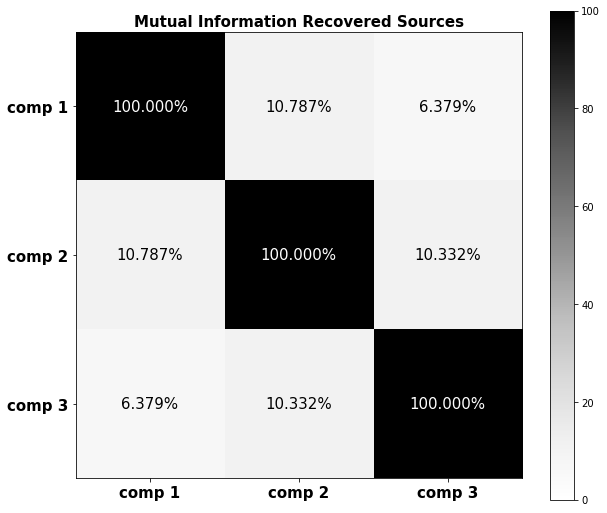

In [13]:
StatisticalAnalysis.plot_mutual_info(MI_reco,title='Recovered Sources',output=save_images,name='run1_reco_MI_100',save=True)

In [30]:
MI_sreco = StatisticalAnalysis.create_mutual_info_matrix(sources,recovered_sources)
MI_sreco

array([[ 0.0645981 ,  0.11796718,  0.6581726 ],
       [ 0.39750679,  0.12778834,  0.09780761],
       [ 0.14699834,  0.62697722,  0.09709199]])

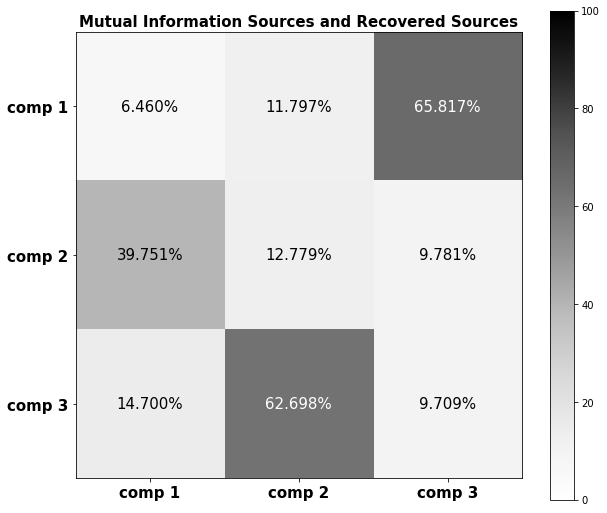

In [31]:
StatisticalAnalysis.plot_mutual_info(MI_sreco,title='Sources and Recovered Sources',output=save_images,name='run1_sourcesreco_MI_100',save=True)

In [32]:
ordened_recovered_sources = np.zeros_like(recovered_sources)
ordened_recovered_sources[0,:] = recovered_sources[2,:]
ordened_recovered_sources[1,:] = recovered_sources[0,:]
ordened_recovered_sources[2,:] = recovered_sources[1,:]

Ordened_MI = StatisticalAnalysis.create_mutual_info_matrix(sources,ordened_recovered_sources)
Ordened_MI

array([[ 0.6581726 ,  0.0645981 ,  0.11796718],
       [ 0.09780761,  0.39750679,  0.12778834],
       [ 0.09709199,  0.14699834,  0.62697722]])

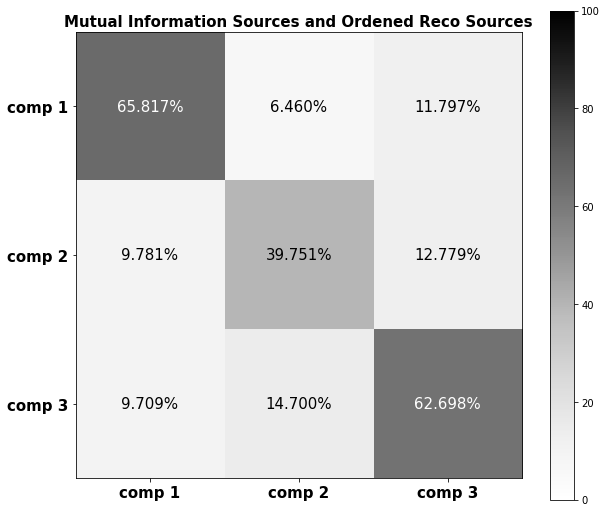

In [33]:
StatisticalAnalysis.plot_mutual_info(Ordened_MI,title='Sources and Ordened Reco Sources',output=save_images,name='run1_sourcesreco_ordened_MI_100',save=True)

In [34]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(sources,ordened_recovered_sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(sources,ordened_recovered_sources)

In [35]:
SKL_div,JS_div

(array([[ 0.14248984,  0.29144978,  0.5290293 ],
        [ 0.22054898,  0.22121689,  0.36034603],
        [ 0.52495858,  0.29558291,  0.07893499]]),
 array([[ 0.07300526,  0.13094826,  0.27246589],
        [ 0.16115227,  0.1030862 ,  0.18580074],
        [ 0.26156564,  0.21628563,  0.04649869]]))

In [36]:
import pandas as pd

JS = pd.DataFrame(JS_div)
SKL = pd.DataFrame(SKL_div)
print JS.to_latex(),SKL.to_latex()

\begin{tabular}{lrrr}
\toprule
{} &         0 &         1 &         2 \\
\midrule
0 &  0.073005 &  0.130948 &  0.272466 \\
1 &  0.161152 &  0.103086 &  0.185801 \\
2 &  0.261566 &  0.216286 &  0.046499 \\
\bottomrule
\end{tabular}
\begin{tabular}{lrrr}
\toprule
{} &         0 &         1 &         2 \\
\midrule
0 &  0.142490 &  0.291450 &  0.529029 \\
1 &  0.220549 &  0.221217 &  0.360346 \\
2 &  0.524959 &  0.295583 &  0.078935 \\
\bottomrule
\end{tabular}



In [37]:
information_algorithm_matrix[0,0] = numero_interacao
information_algorithm_matrix[1,0] = convergence_time
information_algorithm_matrix[2,0] = amari.amariError(matrix_A,fit.mixing_)
information_algorithm_matrix[3,0] = amari.amariError(matrix_A,fit.mixing_,squares=True)
information_algorithm_matrix[4,0] = mean_squared_error(sources,ordened_recovered_sources)
information_algorithm_matrix

array([[ 8.        ,  0.        ,  0.        ],
       [ 0.235     ,  0.        ,  0.        ],
       [ 6.47868365,  0.        ,  0.        ],
       [ 4.54323917,  0.        ,  0.        ],
       [ 1.62272569,  0.        ,  0.        ]])

# Using 1000 stats

In [38]:
sources = np.loadtxt(source_path+'/'+'FirstSource1000Stats.txt')

x = np.loadtxt(obs_path+'FirstMixture1000Stats.txt')


In [39]:
MI_x = StatisticalAnalysis.create_mutual_info_matrix(x,x)
MI_x

array([[ 1.        ,  0.29182805,  0.08034647],
       [ 0.29182805,  1.        ,  0.13243146],
       [ 0.08034647,  0.13243146,  1.        ]])

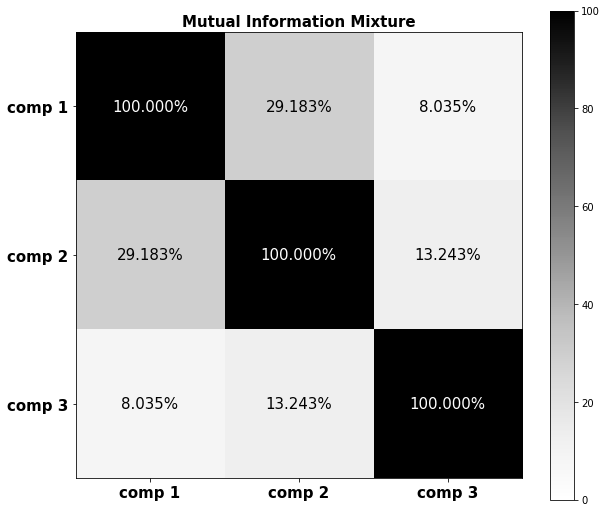

In [41]:
StatisticalAnalysis.plot_mutual_info(MI_x,title='Mixture',output=save_images,name='run1_mix_MI_1k',save=True)

In [42]:
MI_s = StatisticalAnalysis.create_mutual_info_matrix(sources,sources)
MI_s

array([[ 1.        ,  0.02124382,  0.02572556],
       [ 0.02124382,  1.        ,  0.07617088],
       [ 0.02572556,  0.07617088,  1.        ]])

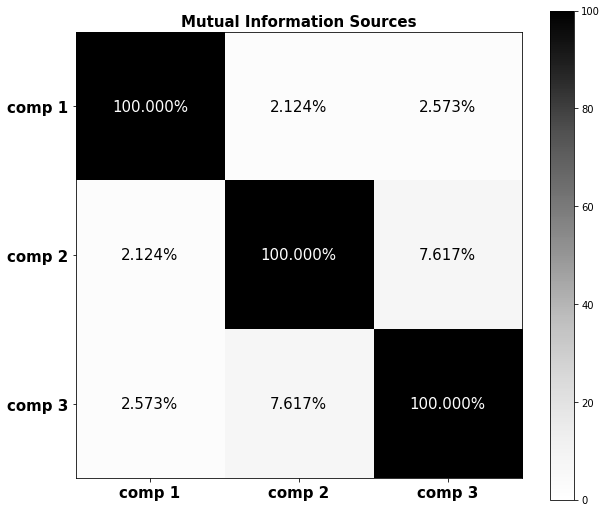

In [43]:
StatisticalAnalysis.plot_mutual_info(MI_s,title='Sources',output=save_images,name='run_sources_MI_1k',save=True)

In [58]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh')
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)
numero_interacao = fit.n_iter_
convergence_time = round(current_time-init_time,3)

number of interations: 5
Time to converges the FastICA: 0.005 seconds


In [59]:
MI_reco = StatisticalAnalysis.create_mutual_info_matrix(recovered_sources,recovered_sources)
MI_reco

array([[ 1.        ,  0.07575352,  0.02609141],
       [ 0.07575352,  1.        ,  0.02445216],
       [ 0.02609141,  0.02445216,  1.        ]])

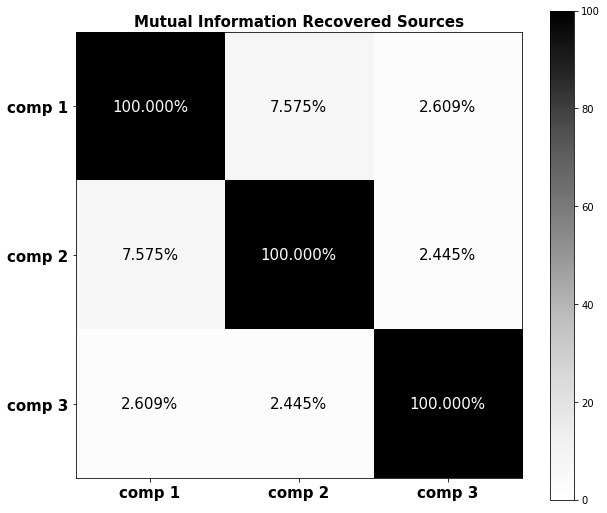

In [60]:
StatisticalAnalysis.plot_mutual_info(MI_reco,title='Recovered Sources',output=save_images,name='run_reco_MI_1k',save=True)

In [61]:
MI_sreco = StatisticalAnalysis.create_mutual_info_matrix(sources,recovered_sources)
MI_sreco

array([[ 0.0255075 ,  0.02074423,  0.75438939],
       [ 0.07358075,  0.83954993,  0.02609839],
       [ 0.87641649,  0.07662974,  0.0253914 ]])

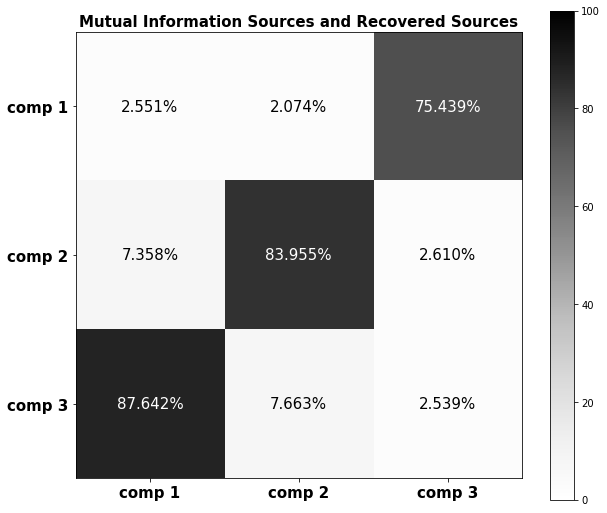

In [62]:
StatisticalAnalysis.plot_mutual_info(MI_sreco,title='Sources and Recovered Sources',output=save_images,name='run1_sourcesreco_MI_1k',save=True)

In [63]:
ordened_recovered_sources = np.zeros_like(recovered_sources)
ordened_recovered_sources[0,:] = recovered_sources[2,:]
ordened_recovered_sources[1,:] = recovered_sources[1,:]
ordened_recovered_sources[2,:] = recovered_sources[0,:]

Ordened_MI = StatisticalAnalysis.create_mutual_info_matrix(sources,ordened_recovered_sources)
Ordened_MI

array([[ 0.75438939,  0.02074423,  0.0255075 ],
       [ 0.02609839,  0.83954993,  0.07358075],
       [ 0.0253914 ,  0.07662974,  0.87641649]])

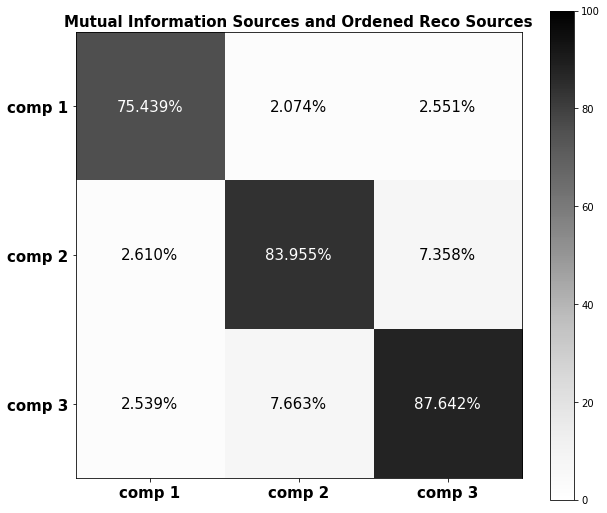

In [64]:
StatisticalAnalysis.plot_mutual_info(Ordened_MI,title='Sources and Ordened Reco Sources',output=save_images,name='run1_sourcesreco_ordened_MI_1k',save=True)

In [65]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(sources,ordened_recovered_sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(sources,ordened_recovered_sources)

In [66]:
SKL_div,JS_div

(array([[ 0.12539572,  0.56543367,  0.59174897],
        [ 0.35212038,  0.08867833,  0.44631846],
        [ 0.55389578,  0.36223323,  0.02047333]]),
 array([[ 0.04932488,  0.21045399,  0.28895535],
        [ 0.26928432,  0.04656108,  0.18036003],
        [ 0.26960321,  0.25967413,  0.01002537]]))

In [67]:
import pandas as pd

JS = pd.DataFrame(JS_div)
SKL = pd.DataFrame(SKL_div)
print JS.to_latex(),SKL.to_latex()

\begin{tabular}{lrrr}
\toprule
{} &         0 &         1 &         2 \\
\midrule
0 &  0.049325 &  0.210454 &  0.288955 \\
1 &  0.269284 &  0.046561 &  0.180360 \\
2 &  0.269603 &  0.259674 &  0.010025 \\
\bottomrule
\end{tabular}
\begin{tabular}{lrrr}
\toprule
{} &         0 &         1 &         2 \\
\midrule
0 &  0.125396 &  0.565434 &  0.591749 \\
1 &  0.352120 &  0.088678 &  0.446318 \\
2 &  0.553896 &  0.362233 &  0.020473 \\
\bottomrule
\end{tabular}



In [68]:
information_algorithm_matrix[0,1] = numero_interacao
information_algorithm_matrix[1,1] = convergence_time
information_algorithm_matrix[2,1] = amari.amariError(matrix_A,fit.mixing_)
information_algorithm_matrix[3,1] = amari.amariError(matrix_A,fit.mixing_,squares=True)
information_algorithm_matrix[4,1] = mean_squared_error(sources,recovered_sources)
information_algorithm_matrix

array([[  8.00000000e+00,   5.00000000e+00,   0.00000000e+00],
       [  2.35000000e-01,   5.00000000e-03,   0.00000000e+00],
       [  6.47868365e+00,   4.02767591e+00,   0.00000000e+00],
       [  4.54323917e+00,   2.11000645e+00,   0.00000000e+00],
       [  1.62272569e+00,   1.41504523e+00,   0.00000000e+00]])

# Using 100K stats

In [69]:
sources = np.loadtxt(source_path+'/'+'FirstSource100000Stats.txt')

x = np.loadtxt(obs_path+'FirstMixture100000Stats.txt')


In [70]:
MI_x = StatisticalAnalysis.create_mutual_info_matrix(x,x)
MI_x

array([[ 1.        ,  0.186486  ,  0.03418576],
       [ 0.186486  ,  1.        ,  0.06067556],
       [ 0.03418576,  0.06067556,  1.        ]])

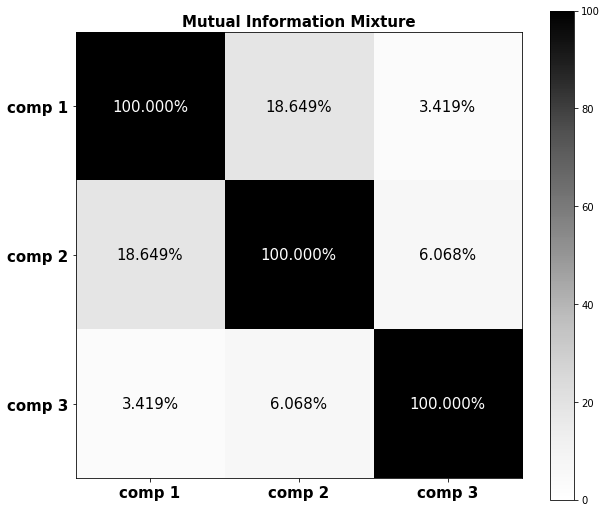

In [71]:
StatisticalAnalysis.plot_mutual_info(MI_x,title='Mixture',output=save_images,name='run1_mix_MI_100k',save=True)

In [72]:
MI_s = StatisticalAnalysis.create_mutual_info_matrix(sources,sources)
MI_s

array([[ 1.        ,  0.00240579,  0.00255892],
       [ 0.00240579,  1.        ,  0.01256203],
       [ 0.00255892,  0.01256203,  1.        ]])

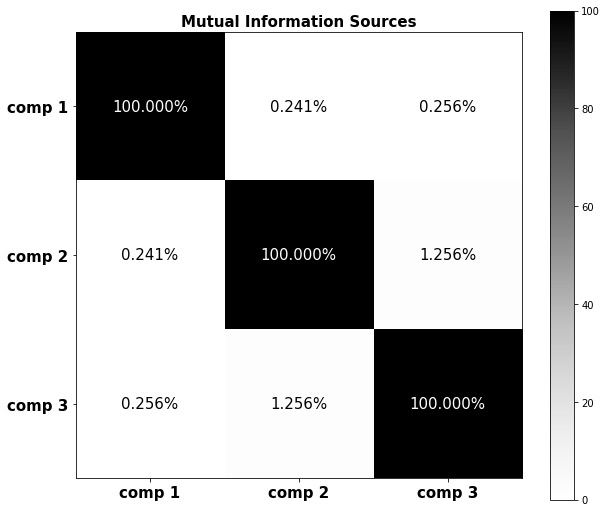

In [73]:
StatisticalAnalysis.plot_mutual_info(MI_s,title='Sources',output=save_images,name='run1_sources_MI_100k',save=True)

In [100]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh')
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)
numero_interacao = fit.n_iter_
convergence_time = round(current_time-init_time,3)

number of interations: 5
Time to converges the FastICA: 0.207 seconds


In [101]:
MI_reco = StatisticalAnalysis.create_mutual_info_matrix(recovered_sources,recovered_sources)
MI_reco

array([[ 1.        ,  0.01265082,  0.0023671 ],
       [ 0.01265082,  1.        ,  0.00258408],
       [ 0.0023671 ,  0.00258408,  1.        ]])

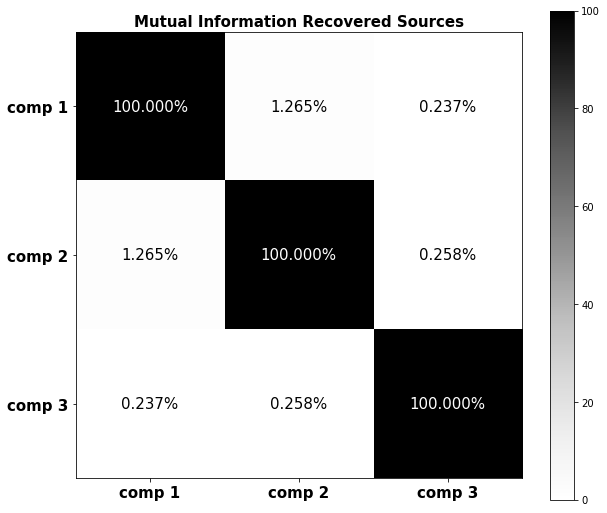

In [102]:
StatisticalAnalysis.plot_mutual_info(MI_reco,title='Recovered Sources',output=save_images,name='run_reco_MI_100k',save=True)

In [103]:
MI_sreco = StatisticalAnalysis.create_mutual_info_matrix(sources,recovered_sources)
MI_sreco

array([[ 0.00243759,  0.00253898,  0.91095899],
       [ 0.90979363,  0.01249499,  0.00233733],
       [ 0.01268999,  0.94373121,  0.00260191]])

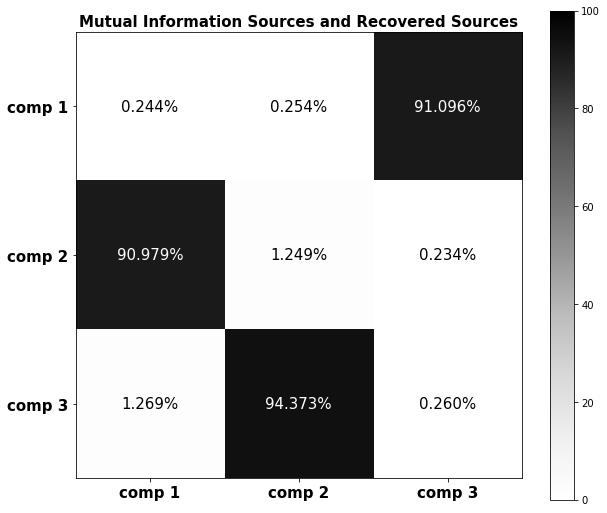

In [104]:
StatisticalAnalysis.plot_mutual_info(MI_sreco,title='Sources and Recovered Sources',output=save_images,name='run1_sourcesreco_MI_100k',save=True)

In [105]:
ordened_recovered_sources = np.zeros_like(recovered_sources)
ordened_recovered_sources[0,:] = recovered_sources[2,:]
ordened_recovered_sources[1,:] = recovered_sources[0,:]
ordened_recovered_sources[2,:] = recovered_sources[1,:]

Ordened_MI = StatisticalAnalysis.create_mutual_info_matrix(sources,ordened_recovered_sources)
Ordened_MI

array([[ 0.91095899,  0.00243759,  0.00253898],
       [ 0.00233733,  0.90979363,  0.01249499],
       [ 0.00260191,  0.01268999,  0.94373121]])

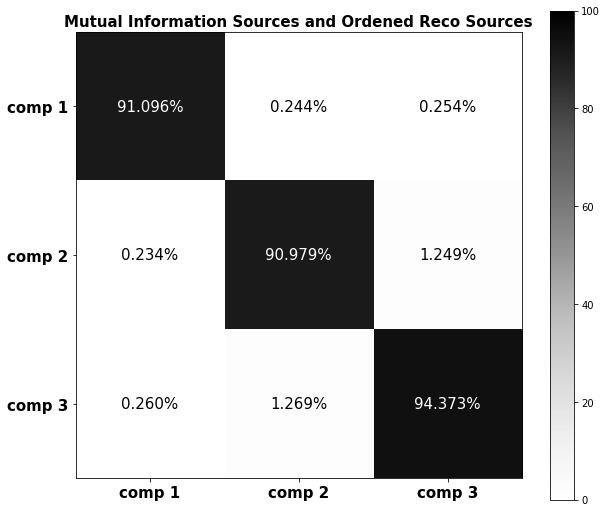

In [106]:
StatisticalAnalysis.plot_mutual_info(Ordened_MI,title='Sources and Ordened Reco Sources',output=save_images,name='run1_sourcesreco_ordened_MI_100k',save=True)

In [107]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(sources,ordened_recovered_sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(sources,ordened_recovered_sources)

In [108]:
SKL_div,JS_div

(array([[ 0.03354989,  0.63781339,  0.81796807],
        [ 0.45109663,  0.00780991,  0.99398585],
        [ 0.71178595,  0.63341341,  0.00353635]]),
 array([[ 0.01442956,  0.23577224,  0.3647087 ],
        [ 0.3212243 ,  0.00404011,  0.31893584],
        [ 0.40512607,  0.49638258,  0.00180512]]))

In [109]:
import pandas as pd

JS = pd.DataFrame(JS_div)
SKL = pd.DataFrame(SKL_div)
print JS.to_latex(),SKL.to_latex()

\begin{tabular}{lrrr}
\toprule
{} &         0 &         1 &         2 \\
\midrule
0 &  0.014430 &  0.235772 &  0.364709 \\
1 &  0.321224 &  0.004040 &  0.318936 \\
2 &  0.405126 &  0.496383 &  0.001805 \\
\bottomrule
\end{tabular}
\begin{tabular}{lrrr}
\toprule
{} &         0 &         1 &         2 \\
\midrule
0 &  0.033550 &  0.637813 &  0.817968 \\
1 &  0.451097 &  0.007810 &  0.993986 \\
2 &  0.711786 &  0.633413 &  0.003536 \\
\bottomrule
\end{tabular}



In [110]:
information_algorithm_matrix[0,2] = numero_interacao
information_algorithm_matrix[1,2] = convergence_time
information_algorithm_matrix[2,2] = amari.amariError(matrix_A,fit.mixing_)
information_algorithm_matrix[3,2] = amari.amariError(matrix_A,fit.mixing_,squares=True)
information_algorithm_matrix[4,2] = mean_squared_error(sources,recovered_sources)
information_algorithm_matrix

array([[  8.00000000e+00,   5.00000000e+00,   5.00000000e+00],
       [  2.35000000e-01,   5.00000000e-03,   2.07000000e-01],
       [  6.47868365e+00,   4.02767591e+00,   5.80110737e+00],
       [  4.54323917e+00,   2.11000645e+00,   3.34578309e+00],
       [  1.62272569e+00,   1.41504523e+00,   1.44750607e+00]])

In [111]:
import pandas as pd

info_run1 = pd.DataFrame(information_algorithm_matrix)
print info_run1.to_latex()

\begin{tabular}{lrrr}
\toprule
{} &         0 &         1 &         2 \\
\midrule
0 &  8.000000 &  5.000000 &  5.000000 \\
1 &  0.235000 &  0.005000 &  0.207000 \\
2 &  6.478684 &  4.027676 &  5.801107 \\
3 &  4.543239 &  2.110006 &  3.345783 \\
4 &  1.622726 &  1.415045 &  1.447506 \\
\bottomrule
\end{tabular}

